In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

df = pd.read_csv('london-stop-and-search.csv')

df.head(5)

/Users/oliverphipps/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (2,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2015-03-02T16:40:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,Asian or Asian British - Bangladeshi (A3),Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,True,False
1,Person search,2015-03-02T16:40:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,Asian or Asian British - Bangladeshi (A3),Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,False,False
2,Person search,2015-03-02T18:45:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,White - Any other White ethnic background (W9),White,Police and Criminal Evidence Act 1984 (section 1),NaN,Suspect arrested,True,True
3,Person search,2015-03-02T19:15:00+00:00,NaN,NaN,NaN,NaN,Male,over 34,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,False,False
4,Person and Vehicle search,2015-03-03T15:50:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,True,True


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302623 entries, 0 to 302622
Data columns (total 15 columns):
Type                                        302623 non-null object
Date                                        302623 non-null object
Part of a policing operation                120808 non-null object
Policing operation                          0 non-null float64
Latitude                                    110615 non-null float64
Longitude                                   110615 non-null float64
Gender                                      299453 non-null object
Age range                                   288579 non-null object
Self-defined ethnicity                      299848 non-null object
Officer-defined ethnicity                   298958 non-null object
Legislation                                 302623 non-null object
Object of search                            216156 non-null object
Outcome                                     302623 non-null object
Outcome linked to ob

In [26]:
df.drop(['Policing operation', 'Self-defined ethnicity', 'Part of a policing operation', 'Latitude', 'Longitude', 'Outcome linked to object of search', 'Removal of more than just outer clothing'], axis=1, inplace=True)

In [27]:
df.describe()

,Type,Date,Gender,Age range,Officer-defined ethnicity,Legislation,Object of search,Outcome
count,302623,302623,299453,288579,298958,302623,216156,302623
unique,3,168827,3,5,5,5,9,8
top,Person search,2015-10-03T20:50:00+00:00,Male,18-24,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action
freq,226691,40,280164,117344,130473,187773,134843,207963


In [28]:
df['Date'] = pd.to_datetime(df['Date']) #converting to datetime as we can see from earlier this is a string currently

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302623 entries, 0 to 302622
Data columns (total 8 columns):
Type                         302623 non-null object
Date                         302623 non-null datetime64[ns]
Gender                       299453 non-null object
Age range                    288579 non-null object
Officer-defined ethnicity    298958 non-null object
Legislation                  302623 non-null object
Object of search             216156 non-null object
Outcome                      302623 non-null object
dtypes: datetime64[ns](1), object(7)
memory usage: 18.5+ MB


In [72]:
df['Date'] = df['Date'].dt.date

In [74]:
df.head()

,Type,Date,Gender,Age range,Officer-defined ethnicity,Legislation,Object of search,Outcome
0,Person search,2015-03-02,Male,25-34,Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested
1,Person search,2015-03-02,Male,25-34,Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested
2,Person search,2015-03-02,Male,25-34,White,Police and Criminal Evidence Act 1984 (section 1),NaN,Suspect arrested
3,Person search,2015-03-02,Male,over 34,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested
4,Person and Vehicle search,2015-03-03,Male,25-34,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested


In [75]:
# df['Age range'].replace('', np.nan, inplace = True) #this would replace all blank values with NaN's

In [76]:
df.isnull().sum()

Type                             0
Date                             0
Gender                        3170
Age range                    14044
Officer-defined ethnicity     3665
Legislation                      0
Object of search             86467
Outcome                          0
dtype: int64

In [77]:
df_clean = df.dropna() #remove all null values so we have clean dataset

In [78]:
df_clean.info() #quick check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205461 entries, 0 to 302622
Data columns (total 8 columns):
Type                         205461 non-null object
Date                         205461 non-null object
Gender                       205461 non-null object
Age range                    205461 non-null object
Officer-defined ethnicity    205461 non-null object
Legislation                  205461 non-null object
Object of search             205461 non-null object
Outcome                      205461 non-null object
dtypes: object(8)
memory usage: 14.1+ MB


In [79]:
#this will tell us when the first and last report in the dataset it
unique_reports = df_clean['Date'].unique()
unique_reports

first_report = unique_reports[0]
last_report = unique_reports[-1]

first_report,last_report

(datetime.date(2015, 3, 2), datetime.date(2017, 4, 30))

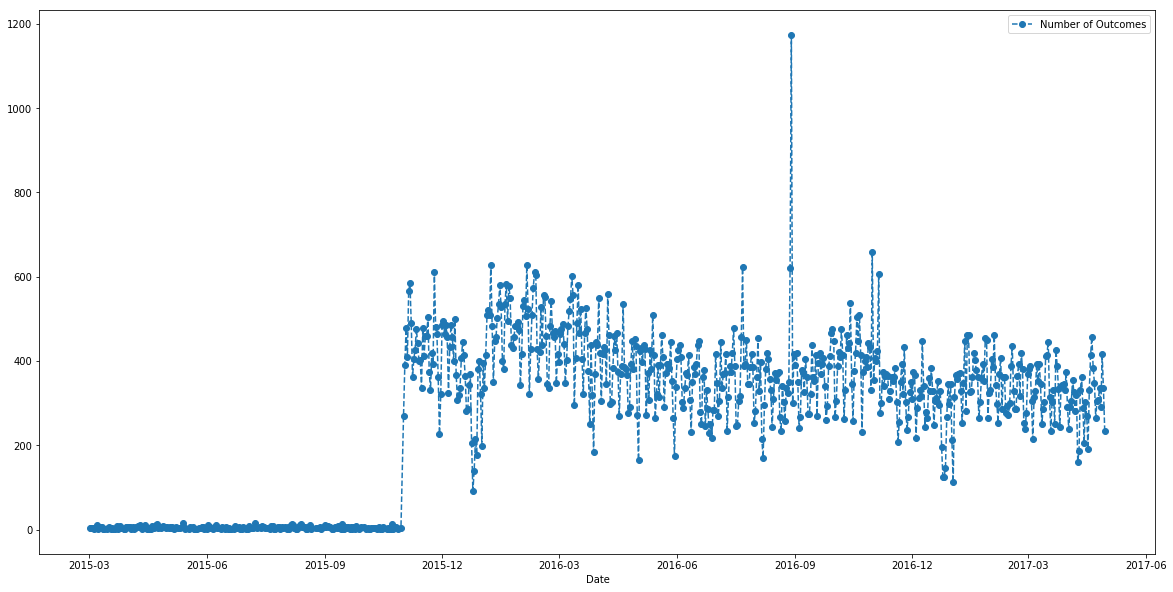

In [80]:
plot_month = df_clean.groupby('Date').size().reset_index(name='Number of Outcomes').set_index('Date')
plot_month
plot_month.plot(kind='line', figsize=(20,10), linestyle='--', marker='o');

In [90]:
#there is a lot of blank data for 2015, I am going to remove this from the dataframe
df['Date'] = pd.to_datetime(df['Date'])
df_clean = df[df['Date'].dt.year != 2015]

In [91]:
#this will tell us when the first and last report in the dataset it
unique_reports = df_clean['Date'].unique()
unique_reports

first_report = unique_reports[0]
last_report = unique_reports[-1]

first_report,last_report

(numpy.datetime64('2016-01-01T00:00:00.000000000'),
 numpy.datetime64('2017-04-30T00:00:00.000000000'))

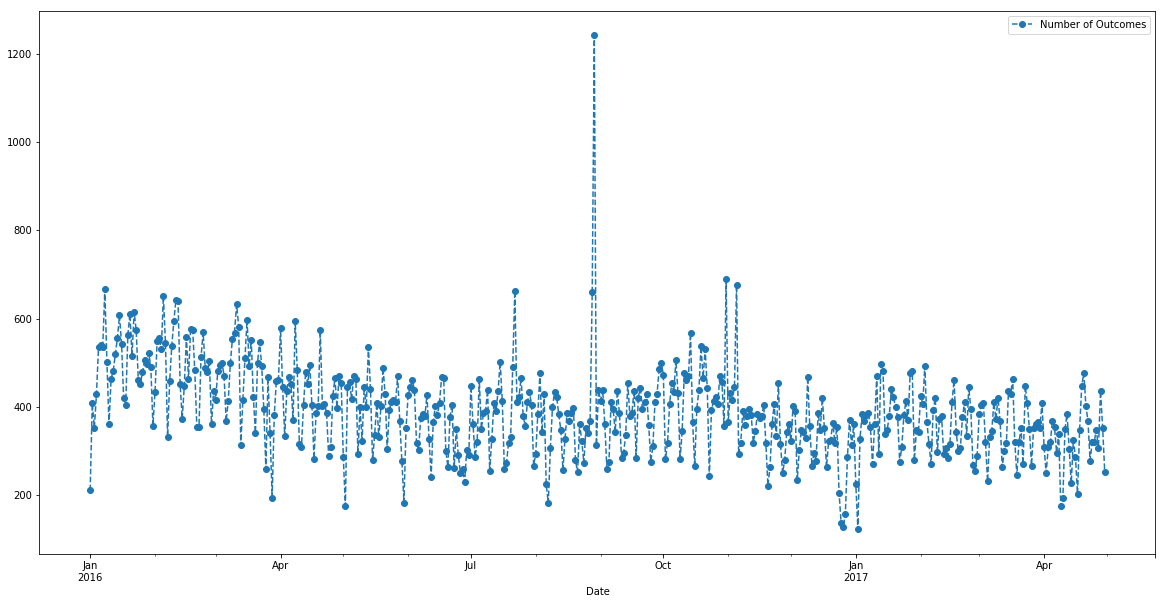

In [92]:
plot_month = df_clean.groupby('Date').size().reset_index(name='Number of Outcomes').set_index('Date')
plot_month
plot_month.plot(kind='line', figsize=(20,10), linestyle='--', marker='o');